In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [51]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv('../input/test.csv')

In [52]:
train_df.head(5)

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [53]:
train_df.columns

Index(['Review Text', 'Review Title', 'topic'], dtype='object')

In [54]:
train_df['review'] = train_df['Review Text'] + train_df['Review Title']
test_df['review'] = test_df['Review Text'] + test_df['Review Title']

In [55]:
del train_df['Review Text']
del train_df['Review Title']
del test_df['Review Text']
del test_df['Review Title']

In [56]:
train_df.head(10)

,topic,review
0,Shipment and delivery,"Did nothing for me, didn't help lost even with..."
1,Not Effective,"Did nothing for me, didn't help lost even with..."
2,Customer Service,I have bought these bags and immediately open...
3,Allergic,Gave me an allergic reaction on my face :(Do n...
4,Texture,These don't compare to the name brand wipes. F...
5,Quality/Contaminated,These don't compare to the name brand wipes. F...
6,Color and texture,These don't compare to the name brand wipes. F...
7,Bad Taste/Flavor,No goodTastes horrible
8,Too big to swallow,These are EXTREMELY hard to swallow. The pills...
9,Quality/Contaminated,First of all the style I am leaving a review f...


In [57]:
train_df = pd.get_dummies(train_df, columns=['topic'])

In [58]:
train_df['review'][0]

"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.Useless"

In [59]:
train_df.columns

Index(['review', 'topic_Allergic', 'topic_Bad Taste/Flavor',
       'topic_Color and texture', 'topic_Customer Issues',
       'topic_Customer Service', 'topic_Didn't Like', 'topic_Expiry',
       'topic_False Advertisement', 'topic_Hard to Chew',
       'topic_Inferior to competitors', 'topic_Ingredients',
       'topic_Not Effective', 'topic_Packaging', 'topic_Pricing',
       'topic_Quality/Contaminated', 'topic_Shipment and delivery',
       'topic_Smells Bad', 'topic_Texture', 'topic_Too Sweet',
       'topic_Too big to swallow', 'topic_Wrong Product received'],
      dtype='object')

In [60]:
train_df.columns = train_df.columns.str.replace('topic_','')

In [61]:
train_df.head(3)

,review,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,Hard to Chew,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,"Did nothing for me, didn't help lost even with...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"Did nothing for me, didn't help lost even with...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,I have bought these bags and immediately open...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
train_df.shape

(5959, 22)

In [63]:
train_df.columns

Index(['review', 'Allergic', 'Bad Taste/Flavor', 'Color and texture',
       'Customer Issues', 'Customer Service', 'Didn't Like', 'Expiry',
       'False Advertisement', 'Hard to Chew', 'Inferior to competitors',
       'Ingredients', 'Not Effective', 'Packaging', 'Pricing',
       'Quality/Contaminated', 'Shipment and delivery', 'Smells Bad',
       'Texture', 'Too Sweet', 'Too big to swallow', 'Wrong Product received'],
      dtype='object')

In [64]:
train_df = train_df.groupby('review')['Allergic', 'Bad Taste/Flavor', 'Color and texture',
       'Customer Issues', 'Customer Service', "Didn't Like", 'Expiry',
       'False Advertisement', 'Hard to Chew', 'Inferior to competitors',
       'Ingredients', 'Not Effective', 'Packaging', 'Pricing',
       'Quality/Contaminated', 'Shipment and delivery', 'Smells Bad',
       'Texture', 'Too Sweet', 'Too big to swallow', 'Wrong Product received'].sum().reset_index()

In [65]:
train_df.shape

(4217, 22)

In [66]:
train_df.head(3)

,review,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,Hard to Chew,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,!!!!!!--->>300 mg of sodium per 1 scoop servin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"""Is it really true that ""Garden of Life sold o...",1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""X Brand"" Brand Revly Vegan Prenatal multivita...",0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [67]:
cols_target = ['Allergic', 'Bad Taste/Flavor', 'Color and texture',
       'Customer Issues', 'Customer Service', "Didn't Like", 'Expiry',
       'False Advertisement', 'Hard to Chew', 'Inferior to competitors',
       'Ingredients', 'Not Effective', 'Packaging', 'Pricing',
       'Quality/Contaminated', 'Shipment and delivery', 'Smells Bad',
       'Texture', 'Too Sweet', 'Too big to swallow', 'Wrong Product received']

In [68]:
train_df.describe()

,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,Hard to Chew,Inferior to competitors,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
count,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,...,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000
mean,0.134456,0.283140,0.055490,0.001897,0.056675,0.007351,0.032250,0.008774,0.001423,0.010434,...,0.144890,0.110742,0.025373,0.169552,0.092483,0.029168,0.097226,0.023002,0.054067,0.023476
std,0.341182,0.451103,0.229994,0.043519,0.231249,0.085434,0.178023,0.093269,0.037698,0.101625,...,0.352705,0.314605,0.157275,0.377174,0.291373,0.168296,0.296300,0.149928,0.226176,0.151429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
no_comment = train_df[train_df['review'].isnull()]
len(no_comment)

0

In [70]:
test_df.head(3)

,review
0,I use chia seed in my protein shakes. These ta...
1,I use chia seed in my protein shakes. These ta...
2,Don’t waste your money.No change. No results.


In [71]:
no_comment = test_df[test_df['review'].isnull()]
len(no_comment)

0

In [72]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 2553
Total rows in train is 4217
Allergic                    567
Bad Taste/Flavor           1194
Color and texture           234
Customer Issues               8
Customer Service            239
Didn't Like                  31
Expiry                      136
False Advertisement          37
Hard to Chew                  6
Inferior to competitors      44
Ingredients                 216
Not Effective               611
Packaging                   467
Pricing                     107
Quality/Contaminated        715
Shipment and delivery       390
Smells Bad                  123
Texture                     410
Too Sweet                    97
Too big to swallow          228
Wrong Product received       99
dtype: int64


In [73]:
train_df['char_length'] = train_df['review'].apply(lambda x: len(str(x)))

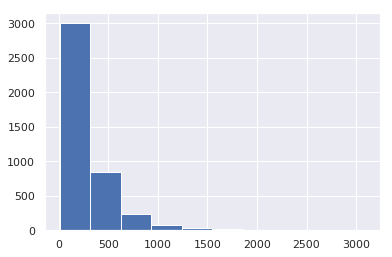

In [74]:
sns.set()
train_df['char_length'].hist()
plt.show()

In [75]:
data = train_df[cols_target]

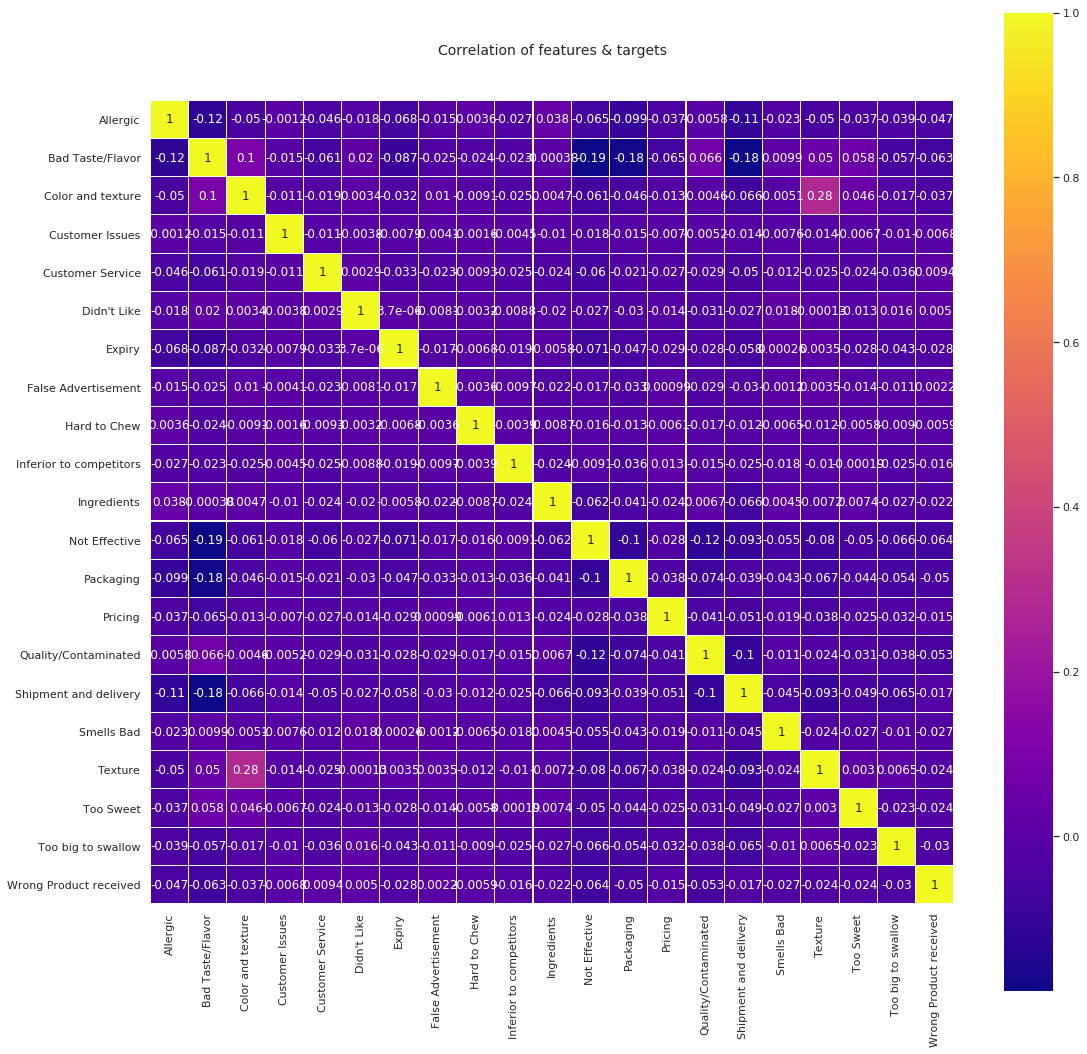

In [76]:
colormap = plt.cm.plasma
plt.figure(figsize=(18,18))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [77]:
test_df['char_length'] = test_df['review'].apply(lambda x: len(str(x)))

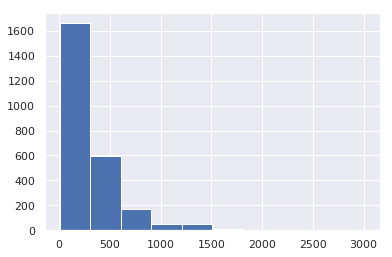

In [78]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [79]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"donâ€™t", "dont ", text)
    text = re.sub(r"doesnâ€™t", "does not ", text)
    text = re.sub(r"Iâ€™ll", "i will ", text)
    text = re.sub(r"Donâ€™t", "dont ", text)
    text = re.sub(r"itâ€™s", "it is ", text)
    text = re.sub(r"isnâ€™t ", "isn't it ", text)
    text = re.sub(r"Iâ€™ve", "i have ", text)
    text = re.sub(r"theyâ€™re", "they are ", text)
    text = re.sub(r"Iâ€™d", "i would' ", text)
    text = re.sub(r"didnâ€™t", "did not ", text)
    text = re.sub(r"Havenâ€™t", "have not ", text)
    text = re.sub(r"isnâ€™t", "is not ", text)
    text = re.sub(r"Vegaâ€™s", "vegas ", text)
    text = re.sub(r"thatâ€™s", "that is ", text)
    text = re.sub(r"wouldnâ€™t", "would not ", text)
    text = re.sub(r"Iâ€™m", "i am ", text)
    text = re.sub(r"vanillaâ€", "venilla ", text)
    text = re.sub(r"â€œnaturally", "naturally ", text)
    text = re.sub(r"flavoredâ€", "flavoured ", text)
    text = re.sub(r"â€œnaturally", "naturally ", text)
    text = re.sub(r"Canâ€™t", "can not ", text)
    text = re.sub(r"wasnâ€™t", "was not ", text)
    text = re.sub(r"Gummyâ€™s", "gummy ", text)
    text = re.sub(r"weâ€™re", "we are ", text)
    text = re.sub(r"Somethingâ€™s â€œfishyâ€", "something ", text)
    text = re.sub(r"youâ€™re", "you are ", text)
    text = re.sub(r"â€œgel capsâ€", "capsules ", text)
    text = re.sub(r"Thereâ€™s", "there is  ", text)
    text = re.sub(r"wouldâ€™ve", "would have ", text)
    text = re.sub(r"werenâ€™t", "were not ", text)
    text = re.sub(r"allï¼Œitâ€™s", "all it is ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [80]:
train_df['review'] = train_df['review'].map(lambda com : clean_text(com))

In [81]:
test_df['review'] = test_df['review'].map(lambda com : clean_text(com))

In [82]:
train_df.columns

Index(['review', 'Allergic', 'Bad Taste/Flavor', 'Color and texture',
       'Customer Issues', 'Customer Service', 'Didn't Like', 'Expiry',
       'False Advertisement', 'Hard to Chew', 'Inferior to competitors',
       'Ingredients', 'Not Effective', 'Packaging', 'Pricing',
       'Quality/Contaminated', 'Shipment and delivery', 'Smells Bad',
       'Texture', 'Too Sweet', 'Too big to swallow', 'Wrong Product received',
       'char_length'],
      dtype='object')

In [83]:
train_df = train_df.drop('char_length',axis=1)

In [84]:
test_df.columns

Index(['review', 'char_length'], dtype='object')

In [85]:
X = train_df.review
test_X = test_df.review

In [86]:
print(X.shape, test_X.shape)

(4217,) (2553,)


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [88]:
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<4217x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 76681 stored elements in Compressed Sparse Row format>

In [89]:
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<2553x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 50803 stored elements in Compressed Sparse Row format>

In [90]:
submission_binary = pd.read_csv('../input/Sample_Submission.csv')

In [91]:
del submission_binary['Review Text']
del submission_binary['Review Title']

In [92]:
submission_binary

,topic
0,Burnt/ Over -roast
1,Bad Flavor/Taste
2,Bitter
3,NaN
4,NaN


In [94]:
submission_binary['review'] = test_df['review']

In [96]:
del submission_binary['topic']

In [97]:
submission_binary.head(3)

,review
0,i use chia seed in my protein shakes these tas...
1,i use chia seed in my protein shakes these tas...
2,don t waste your money no change no results


In [104]:
columns = ['Allergic', 'Bad Taste/Flavor', 'Color and texture','Customer Issues', 'Customer Service', "Didn't Like", 'Expiry','False Advertisement', 'Hard to Chew', 'Inferior to competitors','Ingredients', 'Not Effective', 'Packaging', 'Pricing','Quality/Contaminated', 'Shipment and delivery', 'Smells Bad','Texture', 'Too Sweet', 'Too big to swallow', 'Wrong Product received']

In [106]:
sad = pd.DataFrame(columns=columns)

In [107]:
sad.head(3)

,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,Hard to Chew,Inferior to competitors,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    sad[label] = test_y_prob

... Processing Allergic
Training accuracy is 0.9962058335309462
... Processing Bad Taste/Flavor
Training accuracy is 0.9909888546359972
... Processing Color and texture


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy is 0.9985771875741049
... Processing Customer Issues
Training accuracy is 0.9997628645956841
... Processing Customer Service
Training accuracy is 0.9935973440834717
... Processing Didn't Like
Training accuracy is 0.9973915105525255
... Processing Expiry
Training accuracy is 0.9997628645956841
... Processing False Advertisement
Training accuracy is 0.9997628645956841
... Processing Hard to Chew
Training accuracy is 0.9995257291913683
... Processing Inferior to competitors
Training accuracy is 0.9971543751482096
... Processing Ingredients
Training accuracy is 0.9969172397438938
... Processing Not Effective
Training accuracy is 0.9935973440834717
... Processing Packaging
Training accuracy is 0.9952572919136827
... Processing Pricing
Training accuracy is 0.9990514583827366
... Processing Quality/Contaminated
Training accuracy is 0.9921745316575765
... Processing Shipment and delivery
Training accuracy is 0.9959686981266304
... Processing Smells Bad
Training accuracy is 0.

In [116]:
sad.shape

(2553, 21)

In [110]:
sad.head(12)

,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,Hard to Chew,Inferior to competitors,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,0.013091,0.878359,0.007161,0.000774,0.046362,0.003124,0.007114,0.001512,0.000671,0.001506,...,0.006601,0.010401,0.011808,0.036375,0.001939,0.004412,0.039242,0.003278,0.004855,0.007621
1,0.013091,0.878359,0.007161,0.000774,0.046362,0.003124,0.007114,0.001512,0.000671,0.001506,...,0.006601,0.010401,0.011808,0.036375,0.001939,0.004412,0.039242,0.003278,0.004855,0.007621
2,0.001586,0.005873,0.006379,0.000527,0.004710,0.001561,0.003406,0.001756,0.000465,0.000916,...,0.962414,0.003534,0.011232,0.022270,0.004248,0.002676,0.002857,0.003875,0.011116,0.001458
3,0.137588,0.036757,0.031640,0.000662,0.021237,0.005147,0.002925,0.009305,0.000637,0.003659,...,0.155894,0.101100,0.009384,0.211402,0.007424,0.002024,0.022526,0.009970,0.045023,0.011300
4,0.137588,0.036757,0.031640,0.000662,0.021237,0.005147,0.002925,0.009305,0.000637,0.003659,...,0.155894,0.101100,0.009384,0.211402,0.007424,0.002024,0.022526,0.009970,0.045023,0.011300
5,0.069645,0.305043,0.002330,0.000456,0.063415,0.008633,0.012089,0.001285,0.000727,0.005022,...,0.001980,0.042267,0.008614,0.841944,0.005864,0.305193,0.022371,0.000711,0.011474,0.001903
6,0.069645,0.305043,0.002330,0.000456,0.063415,0.008633,0.012089,0.001285,0.000727,0.005022,...,0.001980,0.042267,0.008614,0.841944,0.005864,0.305193,0.022371,0.000711,0.011474,0.001903
7,0.069645,0.305043,0.002330,0.000456,0.063415,0.008633,0.012089,0.001285,0.000727,0.005022,...,0.001980,0.042267,0.008614,0.841944,0.005864,0.305193,0.022371,0.000711,0.011474,0.001903
8,0.069645,0.305043,0.002330,0.000456,0.063415,0.008633,0.012089,0.001285,0.000727,0.005022,...,0.001980,0.042267,0.008614,0.841944,0.005864,0.305193,0.022371,0.000711,0.011474,0.001903
9,0.003121,0.009103,0.008567,0.001009,0.000396,0.000776,0.001428,0.001611,0.000530,0.001736,...,0.048935,0.029312,0.002106,0.049763,0.975964,0.003006,0.010756,0.001115,0.001749,0.001337


In [152]:
finaltest = pd.read_csv('../input/test.csv')
finaltest['topic'] = sad.idxmax(axis=1)

In [156]:
finaltest.head(3)

In [158]:
finaltest.to_csv("finaltest.csv", index=False)